# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


# Loading Data Sets

In [2]:
#Train data
X_train = pd.read_csv("training_data.csv")

# Training Target Variables  
y_train = pd.read_csv("train_data_classlabels.csv")

# Test Data 
X_test = pd.read_csv("testing_data.csv") 

# Data Analysis and Visualization

In [3]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,50920,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,-0.411854,...,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463,76.10
1,34737,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,...,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,5.95
2,11090,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,0.995869,...,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127,14.95
3,23194,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,1.207850,...,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911,76.60
4,38531,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,-0.260688,...,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859,30.54


In [4]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,...,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000,57116.000000
mean,34983.116097,-0.247795,-0.022058,0.679284,0.169507,-0.269839,0.099197,-0.111731,0.053520,0.013406,...,0.044174,-0.029317,-0.106932,-0.037896,0.006357,0.134607,0.021532,0.002800,0.001178,96.941060
std,14565.105294,1.864050,1.631035,1.410986,1.373157,1.377401,1.301175,1.247802,1.249071,1.157104,...,0.756907,0.746801,0.639153,0.626419,0.597128,0.439791,0.497490,0.379231,0.295386,270.411899
min,0.000000,-36.802320,-63.344698,-33.680984,-5.172595,-42.147898,-23.496714,-31.764946,-73.216718,-9.283925,...,-15.806476,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-7.976100,-9.617915,0.000000
25%,28865.000000,-1.009543,-0.589424,0.192506,-0.723950,-0.887752,-0.640141,-0.601216,-0.143972,-0.675191,...,-0.169140,-0.226106,-0.525390,-0.177981,-0.324780,-0.129791,-0.329274,-0.063496,-0.006171,7.600000
50%,38190.500000,-0.246743,0.074316,0.768041,0.189497,-0.301686,-0.151700,-0.071382,0.065374,-0.073948,...,-0.024862,-0.060934,-0.081307,-0.049691,0.062927,0.172505,-0.076244,0.009027,0.022540,26.265000
75%,46008.250000,1.153809,0.724232,1.399763,1.052439,0.268297,0.491501,0.423102,0.345135,0.663857,...,0.169582,0.115353,0.307514,0.080841,0.403506,0.421531,0.300119,0.082192,0.075379,88.000000
max,54280.000000,1.634039,18.902453,4.101716,16.715537,34.099309,22.529298,36.677268,20.007208,10.392889,...,39.420904,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,19656.530000


In [5]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,48807,-0.839499,0.916987,1.912416,1.108648,-0.672263,0.051176,-0.036875,0.636539,0.050864,...,-0.238961,0.078684,0.414923,-0.085743,0.625238,0.109643,-0.330143,-0.000965,0.003413,15.38
1,40941,-1.560421,1.007666,0.799862,-0.456506,-0.595015,-0.582802,-0.296379,0.964852,-0.204514,...,-0.167403,0.134970,0.288105,-0.154460,0.397320,-0.110161,0.470593,-0.060721,0.014212,1.00
2,46525,-0.216150,-2.541602,-0.932535,0.675208,-1.052992,-0.352356,1.032765,-0.253473,0.087743,...,1.429557,0.397866,-0.554943,-0.808129,0.098446,0.238762,1.014958,-0.251693,0.111646,778.00
3,42859,-0.543125,0.741029,0.552261,0.749349,0.612035,0.797614,1.120176,-0.073450,-0.644201,...,0.098120,0.094355,0.352583,-0.241595,-1.292714,0.009425,-0.152050,0.091837,0.123704,141.75
4,44051,0.887965,-1.055805,0.820712,-0.308878,-1.252033,0.150234,-0.806711,0.214245,0.742892,...,0.351202,0.294355,0.414927,-0.239961,-0.259445,-0.037567,1.501088,-0.099707,0.030234,191.20


In [6]:
X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,...,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14279.000000,14279.000000,14279.000000,14279.000000
mean,35345.333123,-0.261338,-0.033224,0.683750,0.165303,-0.275843,0.102063,-0.126908,0.069022,0.023517,...,0.050772,-0.028368,-0.104593,-0.042133,0.006068,0.139447,0.026486,0.004715,0.008623,97.363434
std,14339.425892,1.932867,1.781349,1.437586,1.380464,1.444585,1.328438,1.283078,1.181575,1.165280,...,0.750022,0.710843,0.632865,0.583837,0.595735,0.439833,0.500119,0.386655,0.411740,269.832946
min,1.000000,-56.407510,-72.715728,-32.965346,-4.826127,-25.772800,-26.160506,-22.518547,-28.035838,-8.739670,...,-12.360962,-14.058810,-6.320710,-25.356744,-2.822384,-6.035054,-1.577118,-8.567638,-8.314029,0.000000
25%,29500.000000,-1.014653,-0.606638,0.197600,-0.732767,-0.895748,-0.631381,-0.619516,-0.134010,-0.668575,...,-0.163261,-0.225138,-0.528313,-0.181334,-0.328621,-0.123204,-0.327162,-0.058714,-0.004948,7.980000
50%,38382.500000,-0.252546,0.059465,0.776673,0.178181,-0.315194,-0.152464,-0.086945,0.073908,-0.067408,...,-0.020651,-0.058950,-0.077318,-0.054863,0.062274,0.179306,-0.071899,0.011436,0.023818,27.300000
75%,46119.500000,1.152175,0.743032,1.409351,1.051571,0.262759,0.501533,0.409507,0.350868,0.665200,...,0.177728,0.118036,0.311062,0.075827,0.403637,0.425861,0.305920,0.084824,0.077486,89.990000
max,54281.000000,1.960497,18.183626,4.226108,16.491217,34.801666,15.496962,23.190971,18.748872,10.370658,...,26.237391,15.631453,4.725713,9.801254,3.962197,5.376595,2.992947,4.599522,33.847808,12910.930000


In [7]:
X_train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [8]:
X_test.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
dtype: int64

In [9]:
# Impute missing values with the mean for numerical columns
X_test.fillna(X_test.mean(), inplace=True)

In [10]:
X_test.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [11]:
print('No Frauds', round(y_train['Class'].value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Frauds', round(y_train['Class'].value_counts()[1]/len(y_train) * 100,2), '% of the dataset')

No Frauds 99.75 % of the dataset
Frauds 0.25 % of the dataset


In [12]:
y_train.value_counts()

Class
0.0      56974
1.0        142
dtype: int64

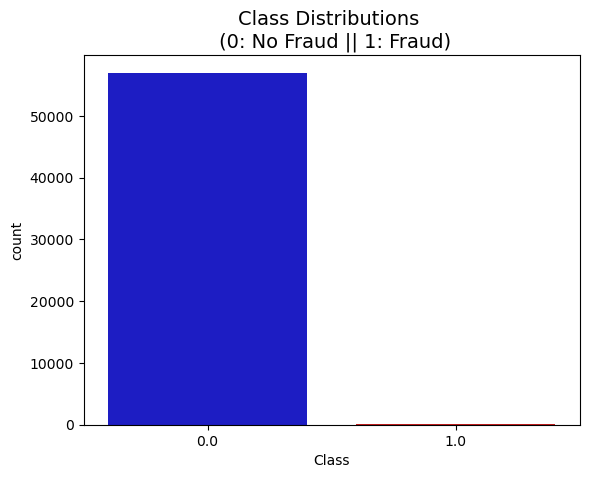

In [13]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=y_train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

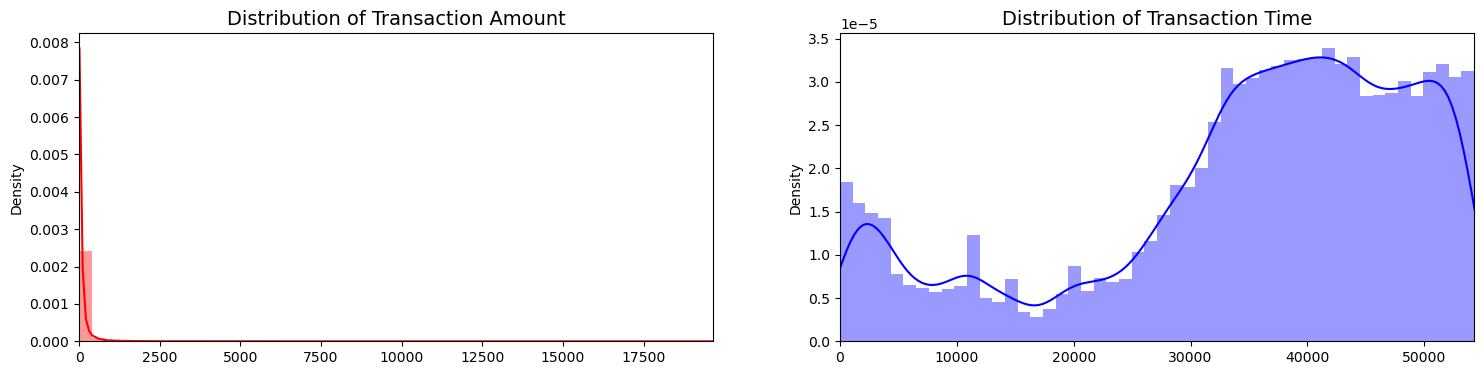

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = X_train['Amount'].values
time_val = X_train['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

# Scaling Time and Amount

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))

X_train.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
scaled_amount = X_train['scaled_amount']
scaled_time = X_train['scaled_time']

X_train.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
X_train.insert(0, 'scaled_amount', scaled_amount)
X_train.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

X_train.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.619838,0.742537,1.086640,0.148385,0.120522,0.974415,-0.035925,-0.406007,0.270339,-0.139679,...,0.012788,0.086793,0.112405,0.221430,-0.226960,0.046246,0.708183,-0.336475,0.002364,0.021463
1,-0.252674,-0.201450,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,...,-0.090979,-0.087916,0.055098,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327
2,-0.140734,-1.580826,-0.352305,0.614321,2.000903,-0.403523,-0.409279,-0.395518,0.094420,0.066611,...,0.057436,-0.059598,0.055236,0.312846,-0.146312,0.317882,-0.307554,0.975876,-0.047407,0.033127
3,0.626057,-0.874776,-2.049784,1.004759,1.726403,1.600998,-1.121759,0.421037,-0.768145,1.133876,...,0.059746,0.155066,0.085733,0.445599,-0.234451,0.040248,0.325920,-0.050118,0.257527,-0.015911
4,0.053172,0.019862,-0.289738,0.880936,1.787349,0.887265,0.125174,-0.845201,1.256896,-0.632290,...,0.347816,0.073293,0.062741,0.503452,-0.202127,0.709686,-0.190366,-0.386543,-0.305748,-0.307859


In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

X_test['scaled_amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test['scaled_time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))

X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [18]:
scaled_amount = X_test['scaled_amount']
scaled_time = X_test['scaled_time']

X_test.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
X_test.insert(0, 'scaled_amount', scaled_amount)
X_test.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

X_test.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.145409,0.627245,-0.839499,0.916987,1.912416,1.108648,-0.672263,0.051176,-0.036875,0.636539,...,-0.299001,-0.238961,0.078684,0.414923,-0.085743,0.625238,0.109643,-0.330143,-0.000965,0.003413
1,-0.320754,0.153946,-1.560421,1.007666,0.799862,-0.456506,-0.595015,-0.582802,-0.296379,0.964852,...,0.131920,-0.167403,0.134970,0.288105,-0.154460,0.397320,-0.110161,0.470593,-0.060721,0.014212
2,9.153701,0.489937,-0.216150,-2.541602,-0.932535,0.675208,-1.052992,-0.352356,1.032765,-0.253473,...,0.473427,1.429557,0.397866,-0.554943,-0.808129,0.098446,0.238762,1.014958,-0.251693,0.111646
3,1.395501,0.269352,-0.543125,0.741029,0.552261,0.749349,0.612035,0.797614,1.120176,-0.073450,...,0.912926,0.098120,0.094355,0.352583,-0.241595,-1.292714,0.009425,-0.152050,0.091837,0.123704
4,1.998476,0.341075,0.887965,-1.055805,0.820712,-0.308878,-1.252033,0.150234,-0.806711,0.214245,...,0.198819,0.351202,0.294355,0.414927,-0.239961,-0.259445,-0.037567,1.501088,-0.099707,0.030234


# Correlation matrix

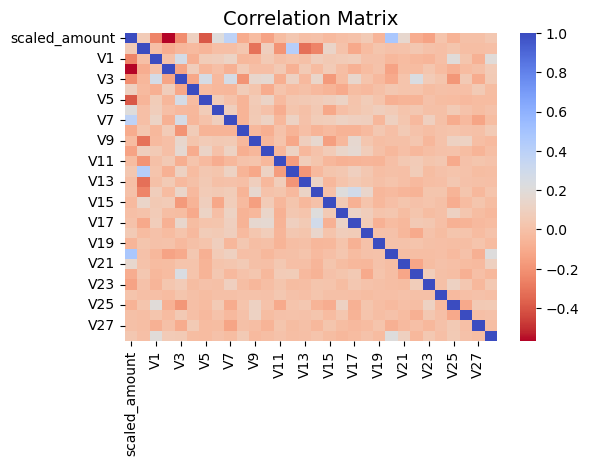

In [19]:
plt.figure(figsize=(6, 4))  # Set the size of the figure

# Entire DataFrame
corr = X_train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.title("Correlation Matrix", fontsize=14)

# Show the plot
plt.show()



# Implementing various classifiers

# 1.Gaussian Naive Bayes 

In [20]:
from sklearn.naive_bayes import GaussianNB  # Naive Bayes Classifier
#from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-nearest neighbors Classifier
from sklearn.model_selection import GridSearchCV  # Gridsearch for Parameter Tuning
from sklearn.pipeline import Pipeline  # Assembling steps to cross-validate together
from sklearn.metrics import classification_report  # For classification report
#from sklearn.svm import SVC  #For Support Vector Machine
from sklearn.model_selection import train_test_split # Train test spliting method
from sklearn.preprocessing import StandardScaler # For Standard Scaler 
from sklearn import datasets #importing datasets
import numpy as np

y_train = np.ravel(y_train)  # To convert array to size (n,), return a contiguous flattened array

"""### Gaussian Naive Bayes Classifier"""

clf1 = GaussianNB()
clf1_parameters = {
    'clf__priors': [[0.5,
                     0.5]],  # Prior probabilities (50 % data of each class)
    'clf__var_smoothing': np.logspace(
        0, -11, num=100
    )  # Portion of the largest variance of all features that is added to variances for calculation stability.
}
pipeline1 = Pipeline([
    ('clf', clf1),
])

# PARAMETER TUNING
grid1 = GridSearchCV(pipeline1, clf1_parameters, scoring='f1_macro', cv=10)
grid1.fit(X_train, y_train)
clf1 = grid1.best_estimator_
print("\nThe best parameters found for Gaussian NB are: \n",
      grid1.best_params_)

print("\nCLASSIFICATION REPORT FOR GAUSSIAN NAIVE BAYES BEST FIT\n\n")
print(classification_report(y_train, clf1.predict(X_train), labels=[0, 1]))



The best parameters found for Gaussian NB are: 
 {'clf__priors': [0.5, 0.5], 'clf__var_smoothing': 1.0}

CLASSIFICATION REPORT FOR GAUSSIAN NAIVE BAYES BEST FIT


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56974
           1       0.43      0.71      0.54       142

    accuracy                           1.00     57116
   macro avg       0.71      0.85      0.77     57116
weighted avg       1.00      1.00      1.00     57116



In [21]:
from sklearn.metrics import classification_report, confusion_matrix


In [22]:
print("\nCONFUSION MATRIX FOR GAUSSIAN NAIVE BAYES \n\n")
print(confusion_matrix(y_train, clf1.predict(X_train)))


CONFUSION MATRIX FOR GAUSSIAN NAIVE BAYES 


[[56840   134]
 [   41   101]]


# Gaussian Naive Bayes with SMOTE

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

# Define the SMOTE technique
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Define the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Create a pipeline that includes SMOTE and the Gaussian Naive Bayes classifier
pipeline1 = Pipeline([
    ('smote', smote),            # Apply SMOTE to balance the classes
    ('clf', gnb_classifier),     # Gaussian Naive Bayes classifier
])

# PARAMETER TUNING
gnb_parameters = {
    'clf__priors': [[0.5, 0.5]],  # Prior probabilities (50 % data of each class)
    'clf__var_smoothing': np.logspace(0, -11, num=100)
}

# Use GridSearchCV with the pipeline including SMOTE
grid2 = GridSearchCV(pipeline1, gnb_parameters, scoring='f1_macro', cv=10)
grid2.fit(X_train, y_train)
clf2 = grid2.best_estimator_

print("\nThe best parameters found for Gaussian NB are: \n", grid2.best_params_)
print("\nCLASSIFICATION REPORT FOR GAUSSIAN NAIVE BAYES WITH SMOTE\n\n")
print(classification_report(y_train, clf2.predict(X_train), labels=[0, 1]))



The best parameters found for Gaussian NB are: 
 {'clf__priors': [0.5, 0.5], 'clf__var_smoothing': 0.599484250318941}

CLASSIFICATION REPORT FOR GAUSSIAN NAIVE BAYES WITH SMOTE


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56974
           1       0.67      0.61      0.64       142

    accuracy                           1.00     57116
   macro avg       0.83      0.81      0.82     57116
weighted avg       1.00      1.00      1.00     57116



In [24]:
print("\nCONFUSION MATRIX FOR GAUSSIAN NAIVE BAYES WITH SMOTE\n\n")
print(confusion_matrix(y_train, clf2.predict(X_train)))


CONFUSION MATRIX FOR GAUSSIAN NAIVE BAYES WITH SMOTE


[[56931    43]
 [   55    87]]


# 2. K - Nearest Neighbour

In [25]:
"""### K-Nearest Neighbor Classfier"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Define a search space
knn_parameters = {
    'clf__n_neighbors': [3, 5, 7],  #  number of neighbors
    'clf__metric': ['euclidean', 'manhattan'],
}

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Create a pipeline that includes the K-Nearest Neighbors classifier
pipeline3 = Pipeline([
    ('clf', knn_classifier),
])

# Use RandomizedSearchCV 
randomized_search = RandomizedSearchCV(pipeline3, knn_parameters, scoring='f1_macro', cv=10, n_iter=10)
randomized_search.fit(X_train, y_train)
clf3 = randomized_search.best_estimator_

print("\nThe best parameters found for KNN are: \n", randomized_search.best_params_)



The best parameters found for KNN are: 
 {'clf__n_neighbors': 3, 'clf__metric': 'euclidean'}


In [26]:
print("\nCLASSIFICATION REPORT FOR KNN BEST FIT\n\n")
print(classification_report(y_train, clf3.predict(X_train), labels=[0, 1]))


CLASSIFICATION REPORT FOR KNN BEST FIT


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56974
           1       0.95      0.87      0.91       142

    accuracy                           1.00     57116
   macro avg       0.98      0.94      0.96     57116
weighted avg       1.00      1.00      1.00     57116



In [27]:
print("\nCONFUSION MATRIX FOR KNN\n\n")
print(confusion_matrix(y_train, clf3.predict(X_train)))


CONFUSION MATRIX FOR KNN


[[56968     6]
 [   18   124]]


# K - Nearest Neighbour with SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline

# Define the SMOTE technique
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Define a search space for KNN
knn_parameters = {
    'clf__n_neighbors': [3, 5, 7],  # Reduced number of neighbors
    'clf__metric': ['euclidean', 'manhattan'],
}

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Create a pipeline that includes SMOTE, KNN, and any other preprocessing steps
pipeline3 = Pipeline([
    ('smote', smote),           # Apply SMOTE to balance the classes
    ('clf', knn_classifier),    # K-Nearest Neighbors classifier
])

# Use RandomizedSearchCV 
randomized_search = RandomizedSearchCV(pipeline3, knn_parameters, scoring='f1_macro', cv=10, n_iter=10)
randomized_search.fit(X_train, y_train)
clf4 = randomized_search.best_estimator_

print("\nThe best parameters found for KNN are: \n", randomized_search.best_params_)



The best parameters found for KNN are: 
 {'clf__n_neighbors': 3, 'clf__metric': 'manhattan'}


In [29]:
print("\nCLASSIFICATION REPORT FOR KNN BEST FIT WITH SMOTE\n\n")
print(classification_report(y_train, clf4.predict(X_train), labels=[0, 1]))


CLASSIFICATION REPORT FOR KNN BEST FIT WITH SMOTE


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56974
           1       0.86      1.00      0.92       142

    accuracy                           1.00     57116
   macro avg       0.93      1.00      0.96     57116
weighted avg       1.00      1.00      1.00     57116



In [30]:
print("\nCONFUSION MATRIX FOR KNN\n\n")
print(confusion_matrix(y_train, clf4.predict(X_train)))


CONFUSION MATRIX FOR KNN


[[56950    24]
 [    0   142]]


# 3. Decision Tree 

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Define a search space for Decision Tree hyperparameters
dt_parameters = {
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=123)

# Create a pipeline that includes the Decision Tree classifier
pipeline_dt = Pipeline([
    ('clf', dt_classifier),
])

# Use RandomizedSearchCV 
randomized_search_dt = RandomizedSearchCV(
    pipeline_dt,
    dt_parameters,
    scoring='f1_macro',
    cv=10,
    n_iter=5,  
    n_jobs=-1,  
)

randomized_search_dt.fit(X_train, y_train)
best_dt_model = randomized_search_dt.best_estimator_

print("\nThe best parameters found for Decision Tree are: \n", randomized_search_dt.best_params_)



The best parameters found for Decision Tree are: 
 {'clf__min_samples_split': 10, 'clf__min_samples_leaf': 4, 'clf__max_depth': 20}


In [32]:
print("\nCLASSIFICATION REPORT FOR DECISION TREE BEST FIT \n\n")
print(classification_report(y_train, best_dt_model.predict(X_train), labels=[0, 1]))


CLASSIFICATION REPORT FOR DECISION TREE BEST FIT 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56974
           1       0.96      0.85      0.90       142

    accuracy                           1.00     57116
   macro avg       0.98      0.93      0.95     57116
weighted avg       1.00      1.00      1.00     57116



In [33]:
print("\nCONFUSION MATRIX FOR DECISION TREE\n\n")
print(confusion_matrix(y_train, best_dt_model.predict(X_train)))


CONFUSION MATRIX FOR DECISION TREE


[[56969     5]
 [   21   121]]


# 4. Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Define a search space for Random Forest hyperparameters
rf_parameters = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=123)

# Use RandomizedSearchCV 
randomized_search_rf = RandomizedSearchCV(
    rf_classifier,
    rf_parameters,
    scoring='f1_macro',
    cv=10,
    n_iter=5,  
    n_jobs=-1,  
)

randomized_search_rf.fit(X_train, y_train)
best_rf_model = randomized_search_rf.best_estimator_

print("\nThe best parameters found for Random Forest are: \n", randomized_search_rf.best_params_)




The best parameters found for Random Forest are: 
 {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [35]:
print("\nCLASSIFICATION REPORT FOR RANDOM FOREST BEST FIT \n\n")
print(classification_report(y_train, best_rf_model.predict(X_train), labels=[0, 1]))


CLASSIFICATION REPORT FOR RANDOM FOREST BEST FIT 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56974
           1       1.00      1.00      1.00       142

    accuracy                           1.00     57116
   macro avg       1.00      1.00      1.00     57116
weighted avg       1.00      1.00      1.00     57116



In [36]:
print("\nCONFUSION MATRIX FOR RANDOM FOREST\n\n")
print(confusion_matrix(y_train, best_rf_model.predict(X_train)))


CONFUSION MATRIX FOR RANDOM FOREST


[[56974     0]
 [    0   142]]


# Best Model after comparing results is RANDOM FOREST

# Predicting labels for test data after comparing results

In [37]:
y_test_predrf = best_rf_model.predict(X_test)

# Convert the predicted labels to integer
y_test_predrf = y_test_predrf.astype(int)

# Create a DataFrame to display the predicted labels
predicted_dfrf = pd.DataFrame({'Predicted Labels': y_test_predrf})

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(predicted_dfrf)

# Reset the option to the default value
pd.reset_option('display.max_rows')

       Predicted Labels
0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
10                    1
11                    0
12                    0
13                    0
14                    0
15                    0
16                    0
17                    0
18                    0
19                    0
20                    0
21                    0
22                    0
23                    0
24                    0
25                    0
26                    0
27                    0
28                    0
29                    0
30                    0
31                    0
32                    0
33                    0
34                    0
35                    0
36                    0
37                    0
38                    0
39                    0
40              

# Saving the Class Labels predicted by Random Forest

In [42]:
# we can see from the classification reports the best model IS RANDOM FOREST among GAUSIAN NAIVE BAYES, KNN ,DECISION TREE AND RANDOM FOREST 
#Hence, saving the predicted labels by RANDOM FOREST CLASSIFIER.
file_path = r"C:\Users\win11\Downloads\Shalvika_Srivastav_Test_Target_Labels.txt"

# Open the file in write mode and write the labels
with open(file_path, "w") as file:
    for label in y_test_predrf:
        file.write(str(label) + "\n")

print("Predicted labels have been saved to", file_path)


Predicted labels have been saved to C:\Users\win11\Downloads\Shalvika_Srivastav_Test_Target_Labels.txt
